In [11]:
%matplotlib inline
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

def getKey(item):
    return item[1]

cat_attributes = """'MS Zoning' 'Street' 'Land Contour' 'Neighborhood' 'Bldg Type' 'House Style' 'Foundation' 'Kitchen Qual' """

cat_attributes = cat_attributes.split("' '")
cat_attributes[0] = 'MS Zoning'
cat_attributes[-1] = 'Kitchen Qual'
print(cat_attributes)
test = [[[143, 191283.25164980203], [142, 134705.15384615384], [59, 218986.94964028776], [144, 126898.49676025918], [34, 77229.84615384616], [87, 80312.5], [10, 81500.0]], [[135, 181100.9239204935], [82, 106663.33333333333]], [[89, 210925.34831460673], [150, 162580.45185583647], [90, 229588.3552631579], [91, 221922.8125]]]
test[0].sort(key=getKey)
print(test[0])


['MS Zoning', 'Street', 'Land Contour', 'Neighborhood', 'Bldg Type', 'House Style', 'Foundation', 'Kitchen Qual']
[[34, 77229.84615384616], [87, 80312.5], [10, 81500.0], [144, 126898.49676025918], [142, 134705.15384615384], [143, 191283.25164980203], [59, 218986.94964028776]]


In [12]:
categories = ['', '1.5Fin', '1.5Unf', '1Fam', '1Story', '2.5Fin', '2.5Unf', '2Story', '2Types', '2fmCon', 'A (agr)', 'ALQ', 'Abnorml', 'AdjLand', 'AllPub', 'Alloca', 'Artery', 'AsbShng', 'AsphShn', 'Attchd', 'Av', 'BLQ', 'Basment', 'Blmngtn', 'Blueste', 'Bnk', 'BrDale', 'Brk Cmn', 'BrkCmn', 'BrkComm', 'BrkFace', 'BrkSide', 'BrkTil', 'BuiltIn', 'C (all)', 'CBlock', 'COD', 'CWD', 'CarPort', 'CemntBd', 'ClearCr', 'ClyTile', 'CmentBd', 'CollgCr', 'CompShg', 'Con', 'ConLD', 'ConLI', 'ConLw', 'Corner', 'Crawfor', 'CulDSac', 'Detchd', 'Duplex', 'Edwards', 'Elev', 'Ex', 'FR2', 'FR3', 'FV', 'Fa', 'Family', 'Feedr', 'Fin', 'Flat', 'Floor', 'FuseA', 'FuseF', 'FuseP', 'GLQ', 'Gable', 'Gambrel', 'Gar2', 'GasA', 'GasW', 'Gd', 'GdPrv', 'GdWo', 'Gilbert', 'Grav', 'Greens', 'GrnHill', 'Grvl', 'Gtl', 'HLS', 'HdBoard', 'Hip', 'I (all)', 'IDOTRR', 'IR1', 'IR2', 'IR3', 'ImStucc', 'Inside', 'Landmrk', 'Low', 'Lvl', 'LwQ', 'Maj1', 'Maj2', 'Mansard', 'MeadowV', 'Membran', 'Metal', 'MetalSd', 'Min1', 'Min2', 'Mitchel', 'Mix', 'Mn', 'MnPrv', 'MnWw', 'Mod', 'N', 'NA', 'NAmes', 'NPkVill', 'NWAmes', 'New', 'No', 'NoRidge', 'NoSeWa', 'NoSewr', 'None', 'Norm', 'Normal', 'NridgHt', 'OldTown', 'Oth', 'OthW', 'Other', 'Othr', 'P', 'PConc', 'Partial', 'Pave', 'Plywood', 'Po', 'PosA', 'PosN', 'PreCast', 'RFn', 'RH', 'RL', 'RM', 'RRAe', 'RRAn', 'RRNe', 'RRNn', 'Rec', 'Reg', 'Roll', 'SBrkr', 'SFoyer', 'SLvl', 'SWISU', 'Sal', 'Sawyer', 'SawyerW', 'Sev', 'Shed', 'Slab', 'Somerst', 'Stone', 'StoneBr', 'Stucco', 'TA', 'Tar&Grv', 'TenC', 'Timber', 'Twnhs', 'TwnhsE', 'Typ', 'Unf', 'VWD', 'Veenker', 'VinylSd', 'WD ', 'Wall', 'Wd Sdng', 'Wd Shng', 'WdShake', 'WdShing', 'WdShngl', 'Wood', 'Y']

print(categories.index('RL'))

with open("AmesHousingCopyQuick.csv") as f:
    reader = csv.reader(f,delimiter=",")
    
    X = []
    y = []
    headings = []
    
    for i, row in enumerate(reader):
        if i==0:
            headings.append(row)
            continue
        y.append(float(row[-1])) #Append the Sale Price from each row to y
        X.append([])
        for item in row[:-1]:
            try:
                if isinstance(ast.literal_eval(item), int): #for each item, append it to the respective row
                    X[i-1].append(int(item))                #if it is a numerical value, or append the corresponding
                else:                                       #integer value if it is a categorical value
                    X[i-1].append(categories.index(item))
            except ValueError:                              #Exceptions deal with ast.literal_eval quirks
                X[i-1].append(categories.index(item))
            except SyntaxError:
                X[i-1].append(categories.index(item))
            
print("X shape:", np.shape(np.array(X)), "Y shape:", np.shape(np.array(y)))
print(headings)
print(X[1])

     

143
X shape: (2930, 14) Y shape: (2930,)
[['MS Zoning', 'Street', 'Land Contour', 'Neighborhood', 'Bldg Type', 'House Style', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Foundation', '1st Flr SF', 'Gr Liv Area', 'Kitchen Qual', 'Garage Cars', 'SalePrice']]
[142, 135, 96, 115, 3, 4, 5, 1961, 1961, 35, 896, 896, 166, 1]


In [13]:
att_pairs = []
for i,column in enumerate(cat_attributes):
    att_pairs.append([])
    index = headings[0].index(column)
    for j,row in enumerate(X):
        temp = [row[index]]
        temp.append(y[j])
        att_pairs[i].append(temp)
        
print(np.shape(np.array(att_pairs)))

#print(np.array(att_pairs))
    #get the index of the column in headings
    #go through X and create a list of list containing pairs of category integer and sale price
#Sample from data
#print(X[1])
#create a list containing the category from each attribute, along with the average price
att_avgs = []
for k,column in enumerate(att_pairs):
    att_avgs.append([])
    for m,row in enumerate(column):
       
        if m == 0:
            att_avgs[k].append(row + [1])
            continue
        test = False
        for l,entry in enumerate(att_avgs[k]):
            if row[0] in entry:
                test = True
                index = l
        if test == False:
            temp = row
            temp.append(1)
            att_avgs[k].append(temp)
        else:
            att_avgs[k][index][1] += row[1]
            att_avgs[k][index][2] += 1
        

print(np.shape(np.array(att_avgs)))       

(8, 2930, 2)
(8,)


In [14]:
#print(np.array(att_avgs[:5]))
cat_total = []
for b, column in enumerate(att_avgs):
    cat_total.append([])
    for row in column:
        cat_total[b].append([row[0]] + [row[1] / row[2]] + [row[2]])
        
print(np.array(cat_total[:3]))


[ [[143, 191283.25164980203, 2273], [142, 134705.15384615384, 26], [59, 218986.94964028776, 139], [144, 126898.49676025918, 463], [34, 77229.84615384616, 26], [87, 80312.5, 2], [10, 81500.0, 1]]
 [[135, 181100.9239204935, 2918], [82, 106663.33333333333, 12]]
 [[96, 178752.3791793313, 2632], [84, 253924.525, 120], [25, 144849.88983050847, 118], [95, 194882.73333333334, 60]]]


Kitchen Qual
['Fa', 'Po', 'TA', 'Gd', 'Ex']
[106922, 107500, 139549, 210835, 338120]
[71, 1, 1494, 1160, 204]


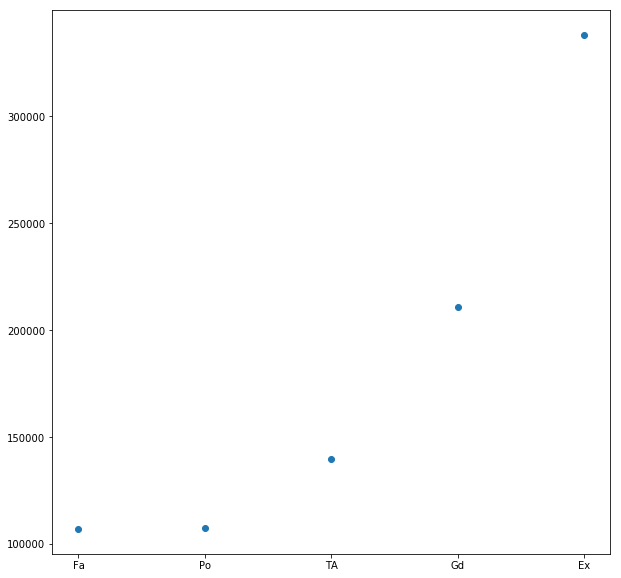

In [16]:
names = []
data = []
counts = []

#print(cat_total[0])
plt.figure(figsize=(10,10))
num = 7
cat_total[num].sort(key=getKey)
for row in cat_total[num]:
    
    names.append(categories[row[0]])
    data.append(int(row[1]))
    counts.append(row[2])
        
xval = range(len(data))
print(cat_attributes[num])
print(names)
print(data)
print(counts)
plt.scatter(xval, data)
plt.xticks(xval, names)
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

print(regressor.get_params())
print()
print("Score: ", regressor.score(X_test, y_test))
print()
print("Sample predictions: ", regressor.predict(X[:6]))
print()
evals = cross_val_score(regressor, X_test, y_test, cv=30)
print(len(evals), "- fold eval scores: \n",  "\n\n", "Average validation score: ",(sum(evals)/len(evals)))

{'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_split': 1e-07, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Score:  0.788404234895

Sample predictions:  [ 215000.  120000.  172000.  244000.  189900.  195500.]

30 - fold eval scores: 
 

 Average validation score:  0.728111225621


After doing very simple cleaning of the data, and not accounting for any missing data, the DecisionTreeRegression shows a score of approximately 65% accuracy (it changes each time I run it) when evaluating using 10-fold cross validation, and a 80-20 train-test split.

I think this can be improved by removing attributes that are missing a large percentage of data and maybe any attributes that aren't very useful.